### Now , we have to test whether our best-fit line equation and the r-squared equation are right or not, or acting as intended or not
### We can do this, only using our sample data.....which we can change according o our wish....thustesting more accurately

0.00101969767724


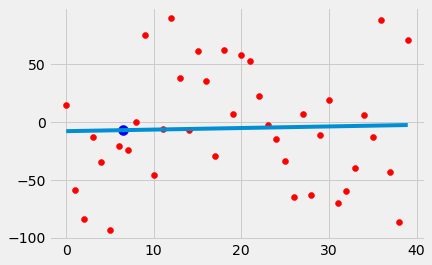

In [12]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('fivethirtyeight')

#folowing default values are not required since we are now creating our own random dataset
# xs = np.array([1,2,3,4,5,6], dtype = np.float64)
# ys = np.array([5,4,6,5,6,7], dtype = np.float64)

#this function is the main for testing the best-fit line and r-Squared error against our created dataset
def create_dataset(how_many_data_points, variance, step=2, correlation=False):
    val = 1 #FIRST initialized value of y
    ys = []  #the array where y value will b stored
    
    for i in range(how_many_data_points):         #for loop for traversing for all the data-points
        y = val + random.randrange(-variance, variance)  #traverse between all from positive to negative
        ys.append(y)                              #thus the ys will contain any value from -variance to +variance
        
        if correlation and correlation=='pos':     #to change the value of 'val' so that ys contains more random values
            val += step
        elif correlation and correlation=='neg':
            val -+ step
    
    xs = [i for i in range(len(ys))]              #only simple values of x in xs just between 1 and length(ys)
    
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys) ) / 
            ((mean(xs)**2) - mean(xs**2)) )
    b = mean(ys) - m * mean(xs)
    return m, b

#this function only gives the summation of the each y form the best-fit line, NOT the coefficient of determination
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

#the function to find the coefficient of determination
def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys]
    squred_err_regr = squared_error(ys_orig, ys_line)
    squred_err_y_mean = squared_error(ys_orig, y_mean_line)
    return (1 - (squred_err_regr/squred_err_y_mean))

xs, ys = create_dataset(40, 100, 2, correlation=False) #calling the NEW function to create dataset,
                                                      #then use other functions on it

m, b = best_fit_slope_and_intercept(xs,ys)

regression_line = [( m * x + b ) for x in xs] #making the regression line

x_predict = 6.5
y_predict = (m * x_predict) + b      #predicting a single y-data

r_squared = coefficient_of_determination(ys, regression_line)    #determining the accuracy using r-Squared method
print (r_squared)

plt.scatter(xs, ys, color='red')
plt.scatter(x_predict, y_predict, s=100, color='blue')        #s is just the size of the point to be predicted
plt.plot(xs, regression_line)
plt.show()

### jodi variance er value komay dei, then points will be much closer to the line, also the coeffi-deter will be much greater, i.e line becomes better